In [74]:
from robust_fitting.circle.model import *

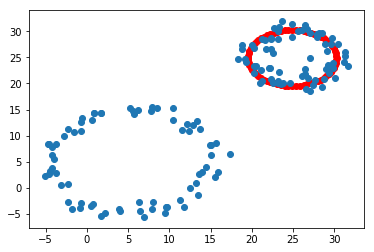

In [118]:
R=10
xc = np.array((5,5))
xk_outliers = build_circle(R,xc,std=1,outliers=True,outliers_ratio=0.09,plot=False)
circle = circle_fitting(xk_outliers,sig=0.2)
circle.fit_irls()
circle.plot()

In [76]:
class point:
    def __init__(self,xks,type_='cart'):
        self.input_type = type_
        self.xks = xks
        self.nKps = xks.shape[1]
    '''returns cartesian coordinates'''
    def c(self):
        if self.input_type=='cart':
            return self.xks
        else:
            return self.xks[:2,:]/self.xks[2,:]
    
    '''returns homogeneous coordinates'''
    def h(self):
        if self.input_type=='cart':
            return np.vstack((self.xks,np.ones(self.nKps)))
        else:
            return self.xks

In [77]:
xks = point(xk_outliers,'cart')
print('homogeneous sample:{}'.format(xks.h()[:,1]))

homogeneous sample:[14.53983778 10.18872291  1.        ]


In [78]:
def get_random_xks(xks,n=2):
    idx = np.arange(xks.shape[1])
    idx = np.random.choice(idx,n)
    xk_list = []
    return xks[:,idx]

In [79]:
class line:
    def __init__(self,l=None,xks=None):
        self.l = l
        if l!=None:
            self.f = self.homog(l)
            
    def line_from_hpoints(self,xk1,xk2):
        self.l = np.cross(xk1,xk2)
        self.f = self.homog(self.l)
        self.xmin = min(xk1[0],xk2[0])
        self.xmax = max(xk1[0],xk2[0])
    
    def __mul__(self,other):
        intersect = np.cross(self.l,other.l)
        intersect = intersect[:2]/intersect[2]
        self.intersect = intersect
        other.intersect = intersect
        
        
    def draw(self,xmin=0,xmax=10,n=10):
        xrange = np.linspace(self.xmin,self.xmax,n)
        return xrange,self.f(xrange)
    def homog(self,l):
        a,b,c = l
        return lambda x:-(a/b)*x-c/b
    def plot(self,c='b'):
        x,y = self.draw(self.xmin,self.xmax,n=10)
        plt.plot(x,y,c=c)
        

In [113]:
def trial():
    xk_rand = point(get_random_xks(xks.h(),4),'homog')

    l_1 = line()
    l_1.line_from_hpoints(xk_rand.h()[:,0],xk_rand.h()[:,1])

    l_2 = line()
    l_2.line_from_hpoints(xk_rand.h()[:,2],xk_rand.h()[:,3])

    plt.scatter(xk_outliers[0,:],xk_outliers[1,:])
    plt.scatter(xk_rand.c()[0,:],xk_rand.c()[1,:])
    l_1.plot()
    l_2.plot(c='r')
    l_1*l_2
    plt.scatter(l_1.intersect[0],l_1.intersect[1],c='y',s=60)

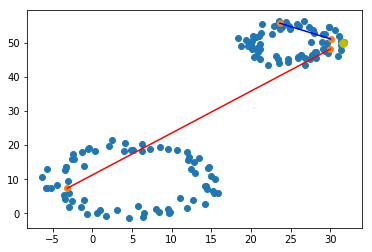

In [114]:
trial()